## nlplotを活用して可視化する

#### データ準備
livedoorニュースコーパスの「ldcc-20140209.tar.gz」データをダウンロードします。 https://www.rondhuit.com/download.html

#### データフレーム作成

In [1]:
%load_ext lab_black

In [2]:
import os
from glob import glob
import pandas as pd
import linecache
import nlplot
import plotly
from plotly.subplots import make_subplots

pd.set_option("display.max_columns", 300)
pd.set_option("display.max_rows", 300)
pd.options.display.float_format = "{:.3f}".format
pd.set_option("display.max_colwidth", 5000)

In [3]:
# カテゴリを配列で取得
categories = [name for name in os.listdir("text") if os.path.isdir("text/" + name)]
print(categories)

['dokujo-tsushin', 'it-life-hack', 'kaden-channel', 'livedoor-homme', 'movie-enter', 'peachy', 'smax', 'sports-watch', 'topic-news']


In [4]:
df = pd.DataFrame(columns=["title", "category"])
for cat in categories:
    path = "text/" + cat + "/*.txt"
    files = glob(path)
    for text_name in files:
        title = linecache.getline(text_name, 3)
        s = pd.Series([title, cat], index=df.columns)
        df = df.append(s, ignore_index=True)

# データフレームシャッフル
df = df.sample(frac=1).reset_index(drop=True)
df.head()

title       category
0                 【Sports Watch】星野監督「お前たちは言い訳するな」\n   sports-watch
1  敗者は去れ？ 再挑戦を認めるか認めないかで荒れるクラウドファンディング「studygift」\n   it-life-hack
2                       大手スーパーによる中国米販売の発表にネット上は賛否\n     topic-news
3               ポイズンが足りない！　新ＧＴＯは反町版ＧＴＯと何が違うのか【話題】\n  kaden-channel
4                    こんこん！紺子には秘策があるんだからねっ【紺子にゅうす】\n   it-life-hack

In [5]:
# 全データ・livedoor-homme・#kaggleをそれぞれインスタンス化
npt = nlplot.NLPlot(df, target_col="title")
npt_livedoor = nlplot.NLPlot(
    df.query('category == "livedoor-homme"'), target_col="title"
)
npt_movie = nlplot.NLPlot(df.query('category == "movie-enter"'), target_col="title")

#### ストップワードの計算

In [6]:
# top_nで頻出上位単語, min_freqで頻出下位単語を指定できる
# 今回は上位5単語（livedoor-homme・movie-enter）をストップワードに指定
stopwords = npt.get_stopword(top_n=5, min_freq=0)
stopwords

['【Sports', '-', 'by', 'ゆるっとcafe', 'PHONE']

#### N-gram bar chart

100%|██████████| 7376/7376 [00:00<00:00, 19803.42it/s]


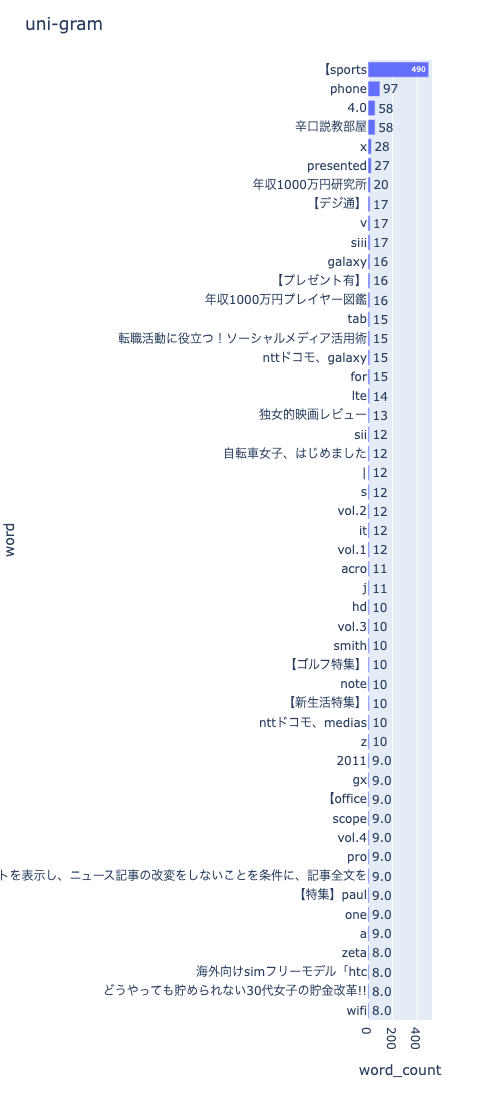

In [7]:
npt.bar_ngram(
    title="uni-gram",
    xaxis_label="word_count",
    yaxis_label="word",
    ngram=1,
    top_n=50,
    width=800,
    height=1100,
    color=None,
    horizon=True,
    stopwords=stopwords,
    verbose=True,
    save=False,
)

100%|██████████| 7376/7376 [00:00<00:00, 29955.69it/s]


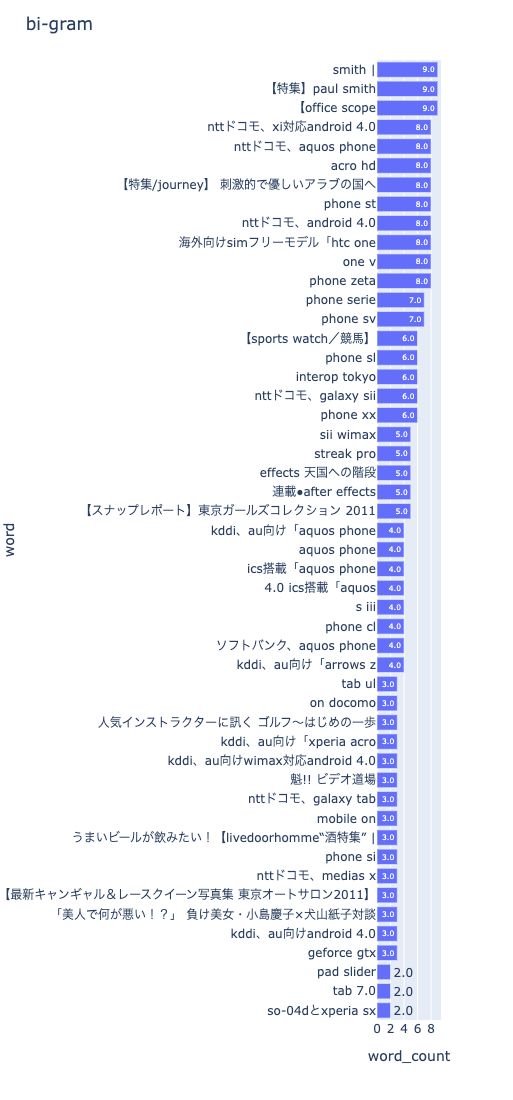

In [8]:
npt.bar_ngram(
    title="bi-gram",
    xaxis_label="word_count",
    yaxis_label="word",
    ngram=2,
    top_n=50,
    width=800,
    height=1100,
    color=None,
    horizon=True,
    stopwords=stopwords,
    verbose=True,
    save=False,
)

100%|██████████| 7376/7376 [00:00<00:00, 22238.54it/s]


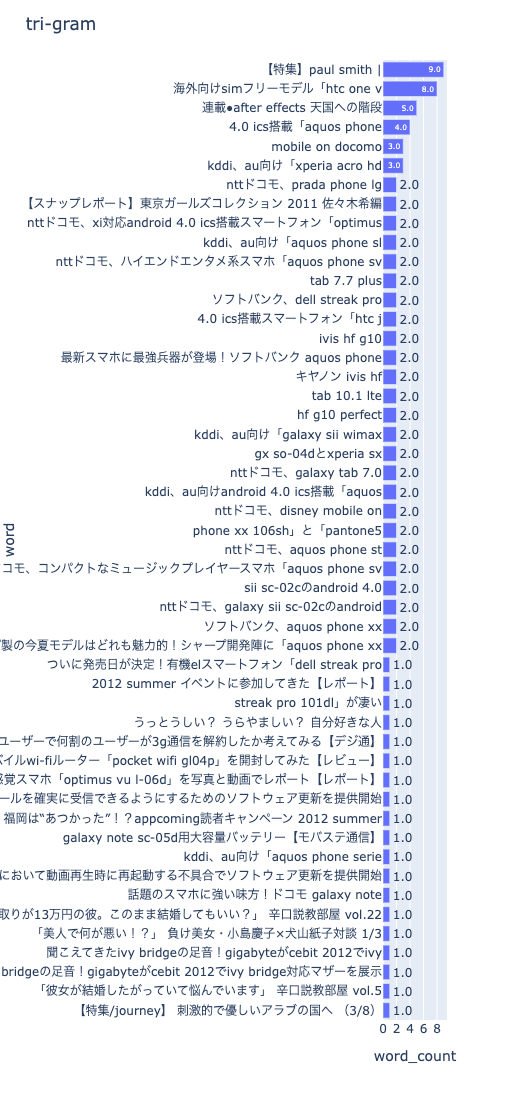

In [9]:
npt.bar_ngram(
    title="tri-gram",
    xaxis_label="word_count",
    yaxis_label="word",
    ngram=3,
    top_n=50,
    width=1000,
    height=1100,
    color=None,
    horizon=True,
    stopwords=stopwords,
    verbose=True,
    save=False,
)

#### ラベルごとに比較

In [10]:
# livedoor-hommeのfigを取得
fig_unigram_livedoor = npt_livedoor.bar_ngram(
    stopwords=stopwords,
    title="uni-gram",
    xaxis_label="word_count",
    yaxis_label="word",
    ngram=1,
    top_n=50,
    width=600,
    height=1100,
    color=None,
    horizon=True,
    verbose=True,
    save=False,
)

# movie-enterのfigを取得
fig_unigram_movie = npt_movie.bar_ngram(
    stopwords=stopwords,
    title="uni-gram",
    xaxis_label="word_count",
    yaxis_label="word",
    ngram=1,
    top_n=50,
    width=600,
    height=1100,
    color=None,
    horizon=True,
    verbose=True,
    save=False,
)

100%|██████████| 871/871 [00:00<00:00, 22392.18it/s]


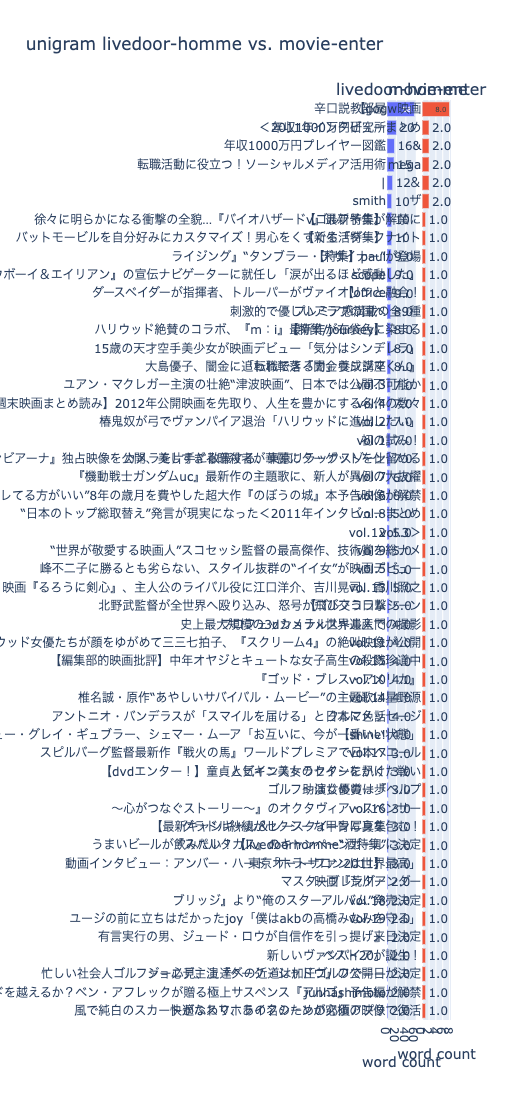

In [11]:
# subplot
trace1 = fig_unigram_livedoor["data"][0]
trace2 = fig_unigram_movie["data"][0]

fig = make_subplots(
    rows=1, cols=2, subplot_titles=("livedoor-homme", "movie-enter"), shared_xaxes=False
)
fig.update_xaxes(title_text="word count", row=1, col=1)
fig.update_xaxes(title_text="word count", row=1, col=2)

fig.update_layout(
    height=1100, width=1900, title_text="unigram livedoor-homme vs. movie-enter"
)
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=1, col=2)

plotly.offline.plot(
    fig, filename="unigram livedoor-homme_vs_movie-enter.html", auto_open=False
)

fig.show()

#### N-gram tree Map

100%|██████████| 7376/7376 [00:00<00:00, 21215.34it/s]


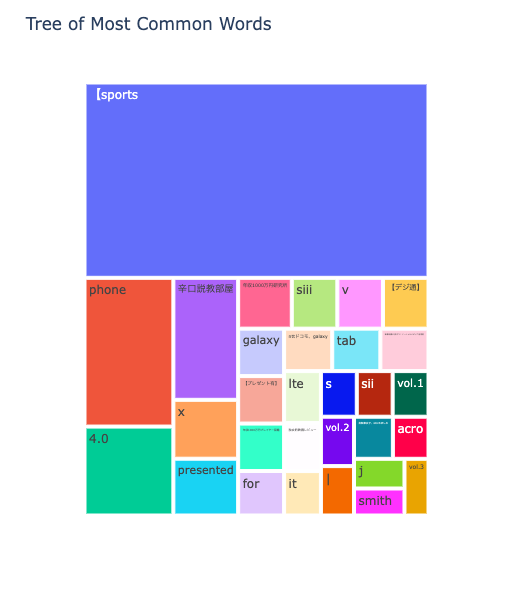

In [12]:
npt.treemap(
    title="Tree of Most Common Words",
    ngram=1,
    top_n=30,
    stopwords=stopwords,
)

#### 単語出現頻度の分布

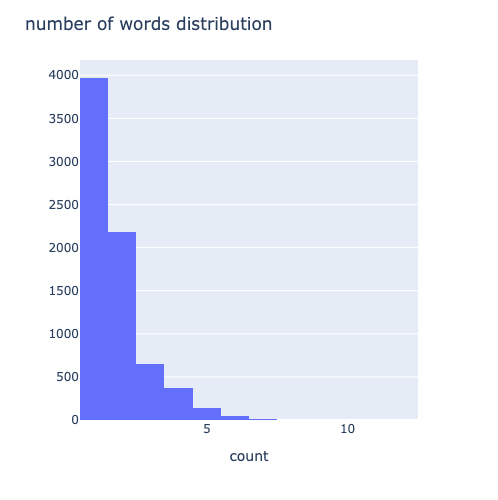

In [13]:
# 単語数の分布
npt.word_distribution(
    title="number of words distribution",
    xaxis_label="count",
    yaxis_label="",
    width=1000,
    height=500,
    color=None,
    template="plotly",
    bins=None,
    save=False,
)

#### ラベル毎

In [14]:
# livedoor-hommeのfigを取得
fig_wd_livedoor = npt_livedoor.word_distribution(
    title="number of words distribution",
    xaxis_label="length",
    yaxis_label="",
    width=1000,
    height=500,
    color=None,
    template="plotly",
    bins=None,
    save=False,
)

# movie-enterのfigを取得
fig_wd_movie = npt_movie.word_distribution(
    title="number of words distribution",
    xaxis_label="length",
    yaxis_label="",
    width=1000,
    height=500,
    color=None,
    template="plotly",
    bins=None,
    save=False,
)

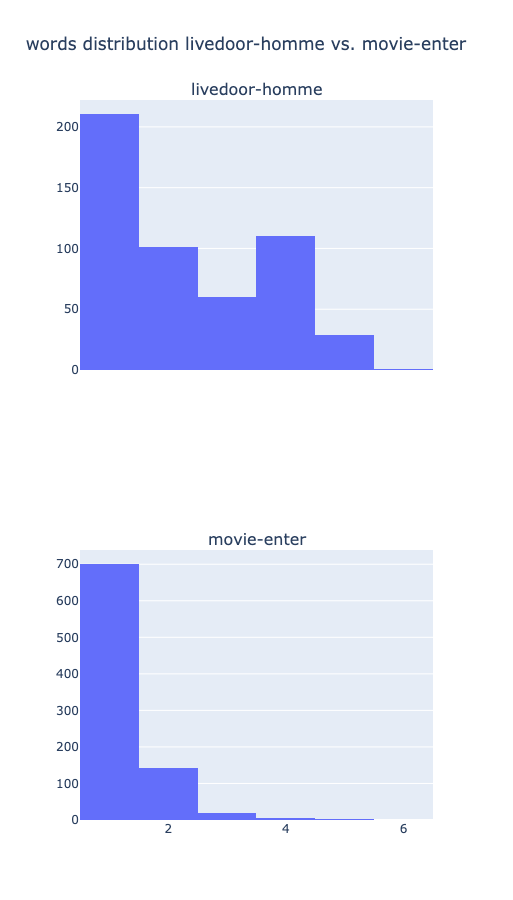

In [15]:
trace1 = fig_wd_livedoor["data"][0]
trace2 = fig_wd_movie["data"][0]

fig = make_subplots(
    rows=2, cols=1, subplot_titles=("livedoor-homme", "movie-enter"), shared_xaxes=True
)

fig.update_layout(
    height=900,
    width=1200,
    title_text="words distribution livedoor-homme vs. movie-enter",
)
fig.add_trace(trace1, row=1, col=1)
fig.add_trace(trace2, row=2, col=1)

plotly.offline.plot(
    fig, filename="words distribution #データサイエンティストvs#kaggle.html", auto_open=False
)

fig.show()

#### word cloud

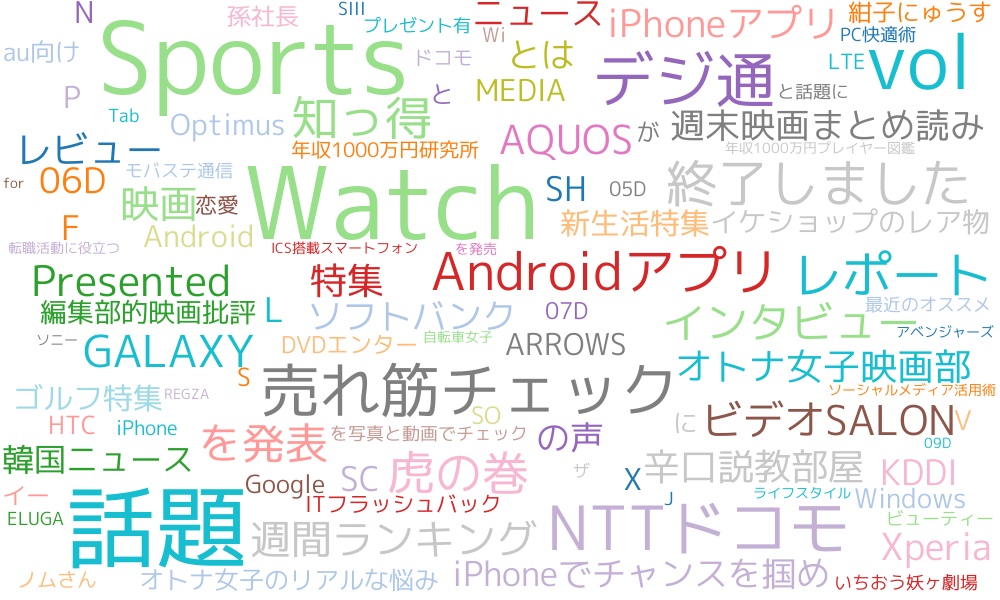

In [16]:
npt.wordcloud(
    stopwords=stopwords,
    width=1000,
    height=600,
    max_words=100,
    max_font_size=100,
    colormap="tab20_r",
    mask_file=None,
    save=True,
)

#### co-occurrence networks

node_size:23, edge_size:15


id  id_code  adjacency_frequency  betweeness_centrality  \
0         Interop        0                    1                  0.000   
1             4.0        1                    2                  0.004   
2              HD        2                    1                  0.000   
3   NTTドコモ、GALAXY        3                    1                  0.000   
4  NTTドコモ、Android        4                    1                  0.000   

   clustering_coefficient  community  
0                   0.000          6  
1                   0.000          0  
2                   0.000          4  
3                   0.000          8  
4                   0.000          0

(23, 6)

source          target  edge_frequency  source_code  target_code
0  Smith               |               9           18           20
1  Smith        【特集】Paul               9           18           21
2      |        【特集】Paul               9           20           21
3  Scope         【Office               9            7           22
4    4.0  NTTドコモ、Android               8            1            4

(15, 5)

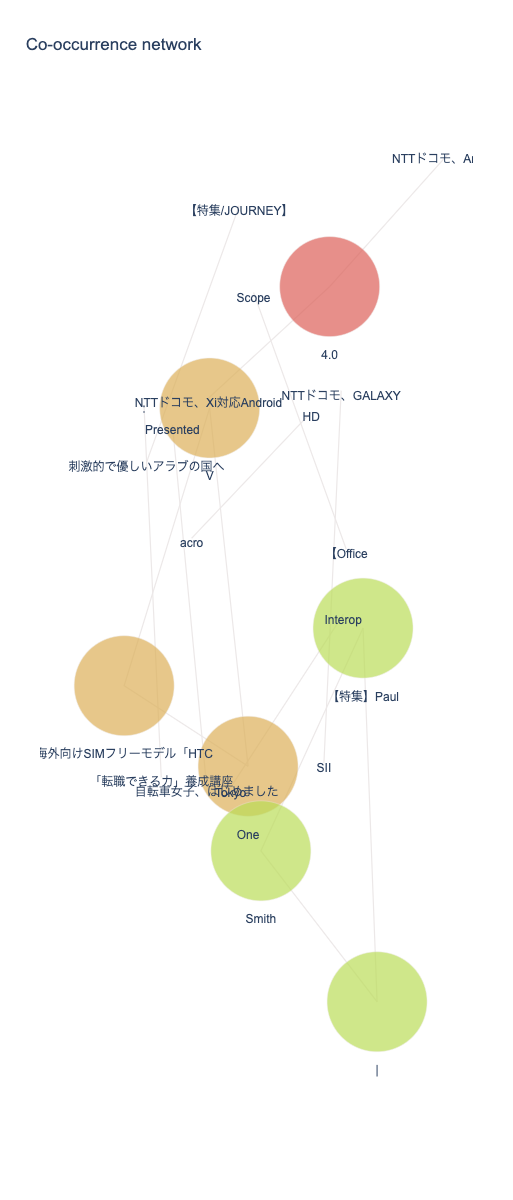

In [17]:
# ビルド（データ件数によっては処理に時間を要します）※ノードの数のみ変更
npt.build_graph(stopwords=stopwords, min_edge_frequency=5)

display(npt.node_df.head(), npt.node_df.shape, npt.edge_df.head(), npt.edge_df.shape)

npt.co_network(
    title="Co-occurrence network",
)

#### sunburst chart

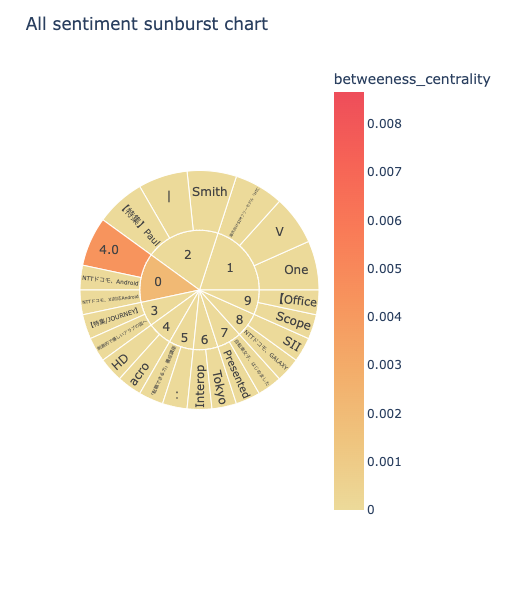

In [18]:
npt.sunburst(
    title="All sentiment sunburst chart",
    colorscale=True,
    color_continuous_scale="Oryel",
    width=800,
    height=600,
    save=True,
)

In [19]:
npt.ldavis(num_topics=2, passes=5, save=True)

AttributeError: 'NLPlot' object has no attribute 'ldavis'

In [ ]:
npt.ldavis